## <font color = blue> Exit Test Coding

### Import the necessary libraries & Load the dataset into python environment : 

In [1]:
import numpy as np
import pandas as pd

# Plotting the data:
import matplotlib.pyplot as plt
import seaborn as sns 

# Preprocessing the dataset:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Split the dataset into training and testing sets:
from sklearn.model_selection import train_test_split

# Classification algorithms:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Analysis of classificaiton algorithms:
from sklearn.metrics import accuracy_score


# Analysis of classificaiton algorithms:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

# Model Selection
from sklearn.model_selection import cross_val_score, StratifiedKFold,KFold

In [2]:
# Remove warnings:

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
data = pd.read_csv(r'C:\Users\sajee\Downloads\train.csv') 

#### Display the Head & Tail to get a quick overview of the data in a DataFrame :

In [4]:
data.head()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [5]:
data.tail()

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
13989,PLID_10956,Viva Stepney,20,M,Uruguay,6'0,161lbs,60.0,48.0,62.0,...,Right,6.0,NaN,7.6,2.0,Medium,Academy,6.0,0.0,1
13990,PLID_17290,Illa Pitre,18,F,England,5'10,165lbs,53.0,68.0,59.0,...,Right,5.3,0.0,5.6,3.0,Medium,Academy,4.0,0.0,0
13991,PLID_5193,Marylouise Mosley,17,M,Japan,6'0,172lbs,56.0,73.0,62.0,...,Left,5.7,0.0,7.7,3.0,Low,Talent Hunt,2.0,0.0,1
13992,PLID_12173,Teri Escamilla,20,F,Ukraine,5'10,150lbs,71.0,69.0,70.0,...,Left,6.8,1.0,5.8,4.0,Medium,Academy,6.0,0.0,1
13993,PLID_236,Darius Schuman,16,F,Chile,5'8,159lbs,53.0,59.0,67.0,...,Right,4.2,0.0,6.7,0.0,Medium,Source,1.0,0.0,0


### Perform Data understanding and Exploration: 

In [6]:
data.shape

(13994, 30)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [8]:
data.describe()

,age,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,mental_strength,goalkeeping_skills,defending_skills,passing_skills,...,shot_accuracy,body_strength_stamina,max_running_speed,behaviour_rating,matches_played,fitness_rating,trophies_won,years_of_experience,no_of_disqualifications,selection
count,13994.000000,13581.000000,13994.000000,13994.000000,13970.000000,13964.000000,13966.000000,13994.000000,13994.000000,13994.000000,...,13422.000000,13994.000000,13994.000000,13291.000000,13328.000000,13299.000000,13994.000000,13850.000000,13994.000000,13994.000000
mean,21.135844,56.043958,61.934329,62.753323,63.612026,48.495703,56.768366,16.474632,48.108118,52.935973,...,47.178140,62.652780,23.586094,5.822068,3.908463,6.405482,3.389095,6.434152,-4.740675,0.557525
std,5.162719,16.787353,14.931963,14.203638,11.938712,15.767506,11.977744,16.874551,16.821929,14.201782,...,15.803991,11.512526,5.194387,1.095702,13.583229,1.706983,1.709152,4.450954,72.023656,0.496698
min,16.000000,5.000000,12.000000,9.000000,14.000000,7.000000,9.000000,1.000000,9.000000,13.000000,...,7.000000,15.000000,5.400000,2.100000,0.000000,1.000000,0.000000,1.000000,-999.000000,0.000000
25%,17.000000,51.000000,54.000000,55.000000,57.000000,39.000000,49.000000,10.000000,36.000000,45.000000,...,38.000000,56.000000,21.100000,5.100000,0.000000,5.600000,2.000000,2.000000,0.000000,0.000000
50%,20.000000,61.000000,64.000000,65.000000,64.000000,49.000000,58.000000,11.000000,52.000000,56.000000,...,50.000000,64.000000,24.600000,5.900000,0.000000,6.800000,3.000000,6.000000,0.000000,1.000000
75%,24.000000,67.000000,72.000000,73.000000,72.000000,60.000000,65.000000,12.000000,61.000000,63.000000,...,59.000000,71.000000,27.100000,6.500000,1.000000,7.500000,5.000000,10.000000,0.000000,1.000000
max,61.000000,95.000000,96.000000,97.000000,95.000000,92.000000,92.000000,88.000000,86.000000,89.000000,...,86.000000,92.000000,35.000000,9.800000,151.000000,10.000000,9.000000,26.000000,25.000000,1.000000


####  Display Number of numerical columns & Number of categorical columns in the DataFrame:

In [9]:
numerical_columns = data.select_dtypes(include=['float', 'int']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

print(f"Number of Numerical Columns: {len(numerical_columns)}")
print(f"Number of Categorical Columns: {len(categorical_columns)}")

Number of Numerical Columns: 21
Number of Categorical Columns: 9


###  Explore the relationship between variables in dataset:

###### Univariate Analysis:

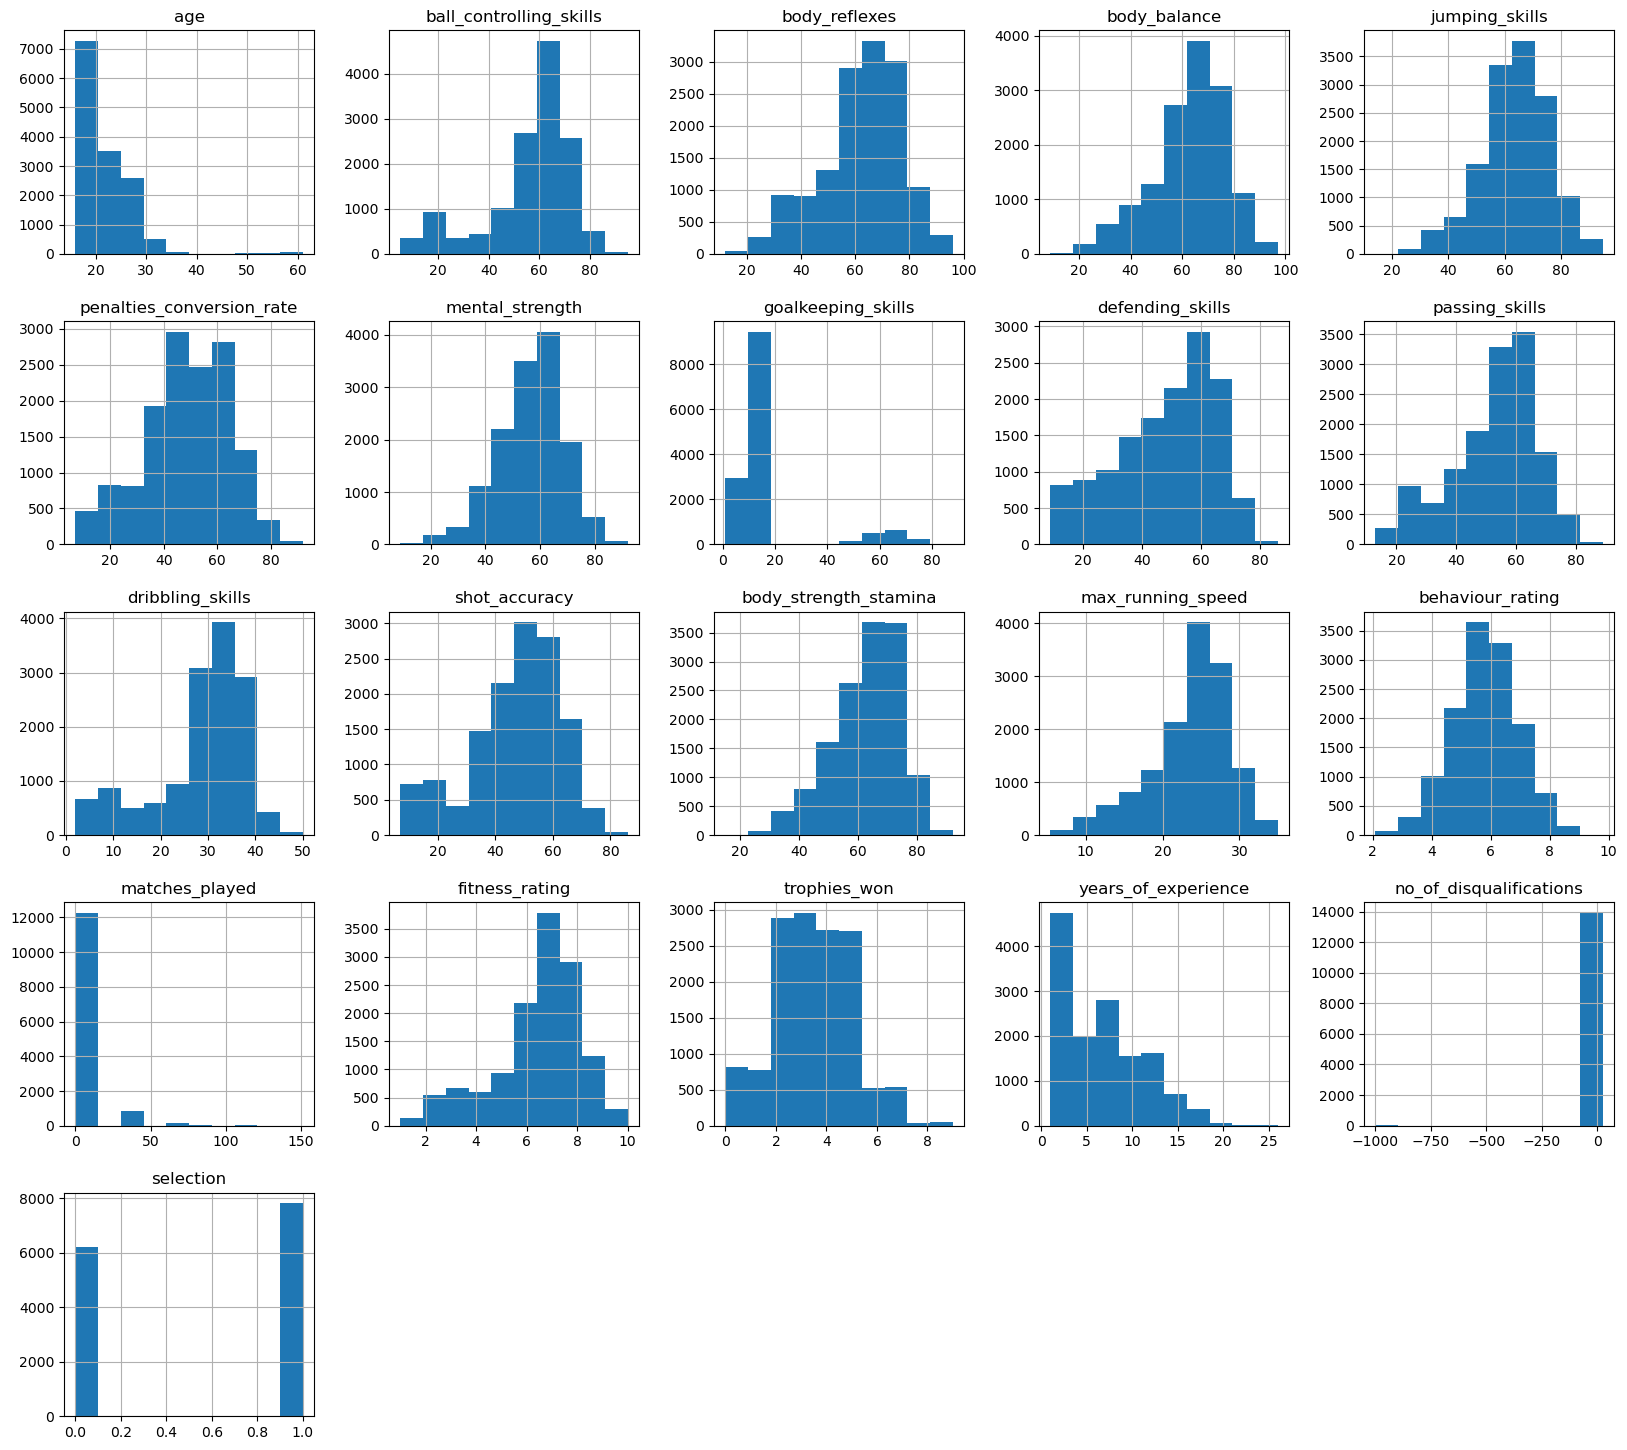

In [10]:
freqgraph = data.select_dtypes(include=['float' , 'int'])
freqgraph.hist(figsize=(20,18))
plt.show()

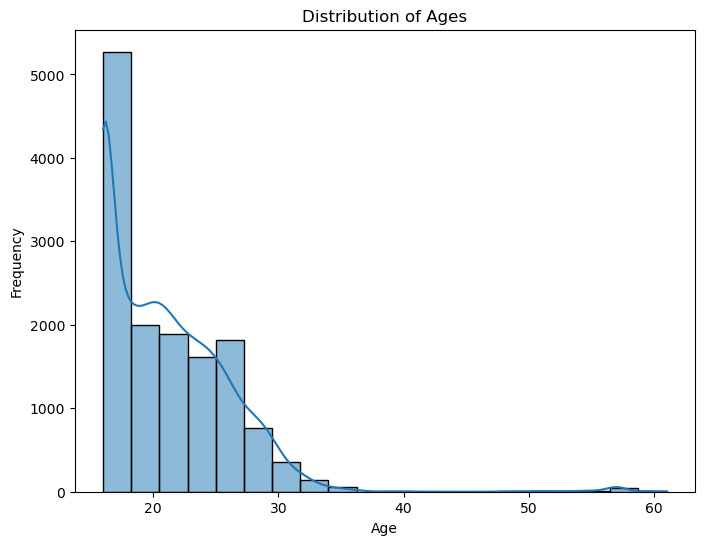

In [11]:
plt.figure(figsize=(8, 6))
sns.histplot(data['age'], bins=20, kde=True)
plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

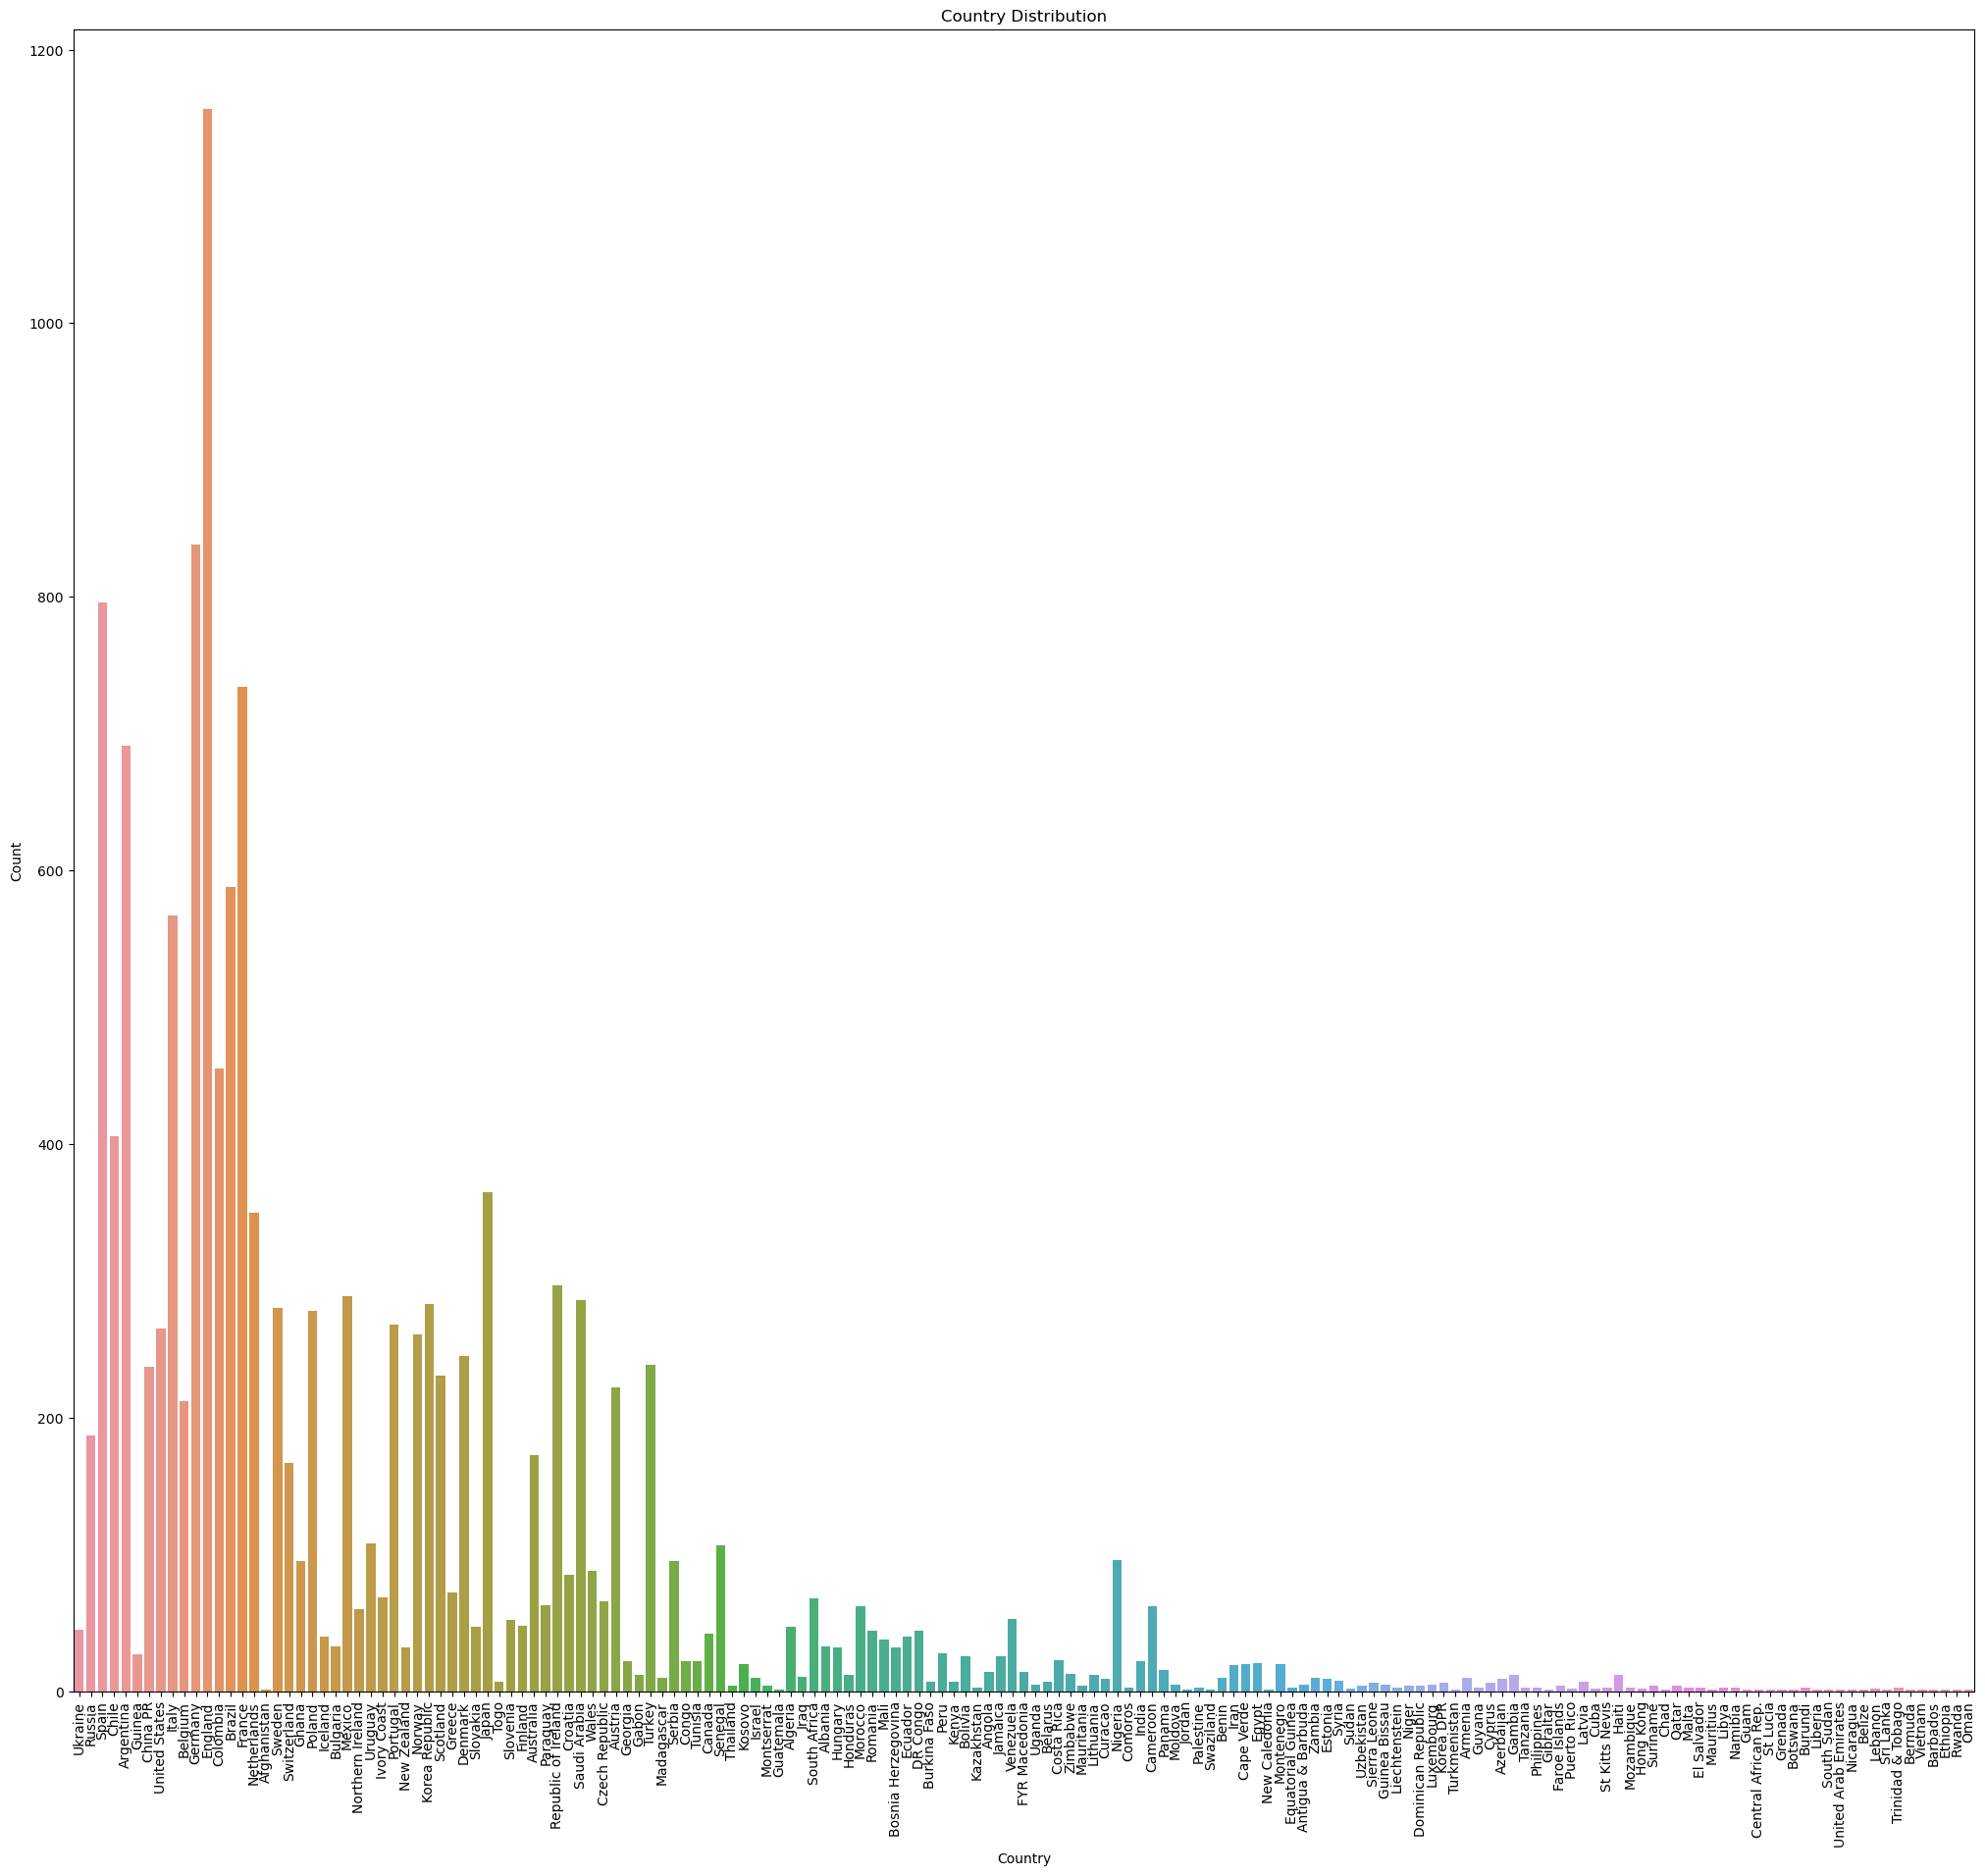

In [12]:
plt.figure(figsize=(25, 22))
sns.countplot(x='country', data=data)
plt.title('Country Distribution')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

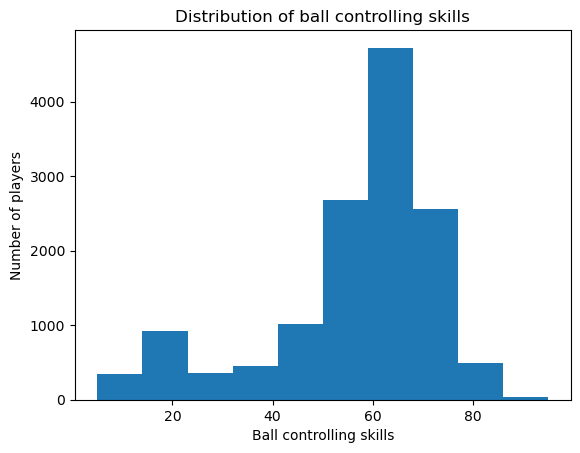

In [13]:
plt.hist(data["ball_controlling_skills"])
plt.xlabel("Ball controlling skills")
plt.ylabel("Number of players")
plt.title("Distribution of ball controlling skills")
plt.show()

###### Bivariate Analysis: 

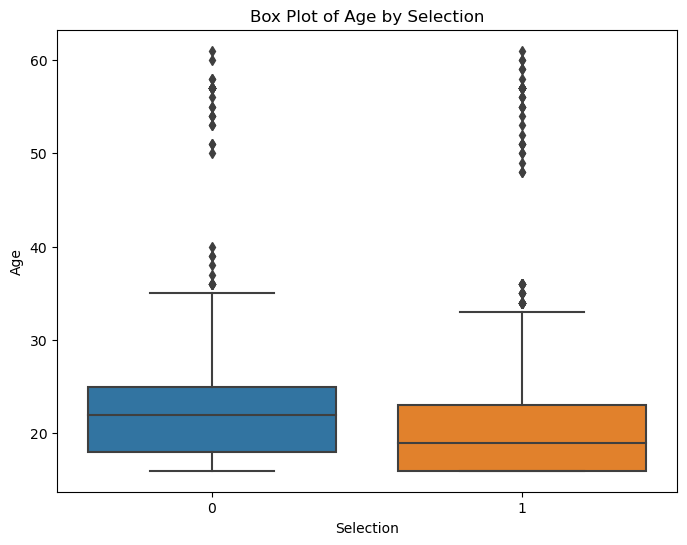

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='selection', y='age', data=data)
plt.title('Box Plot of Age by Selection')
plt.xlabel('Selection')
plt.ylabel('Age')
plt.show()

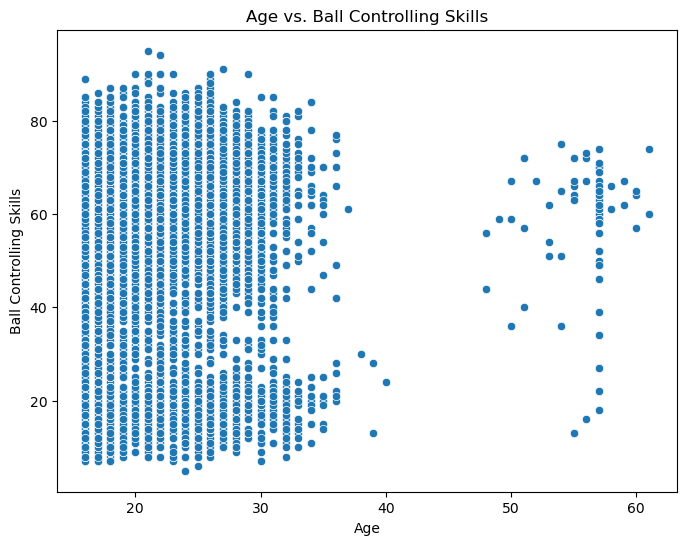

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='ball_controlling_skills', data=data)
plt.title('Age vs. Ball Controlling Skills')
plt.xlabel('Age')
plt.ylabel('Ball Controlling Skills')
plt.show()

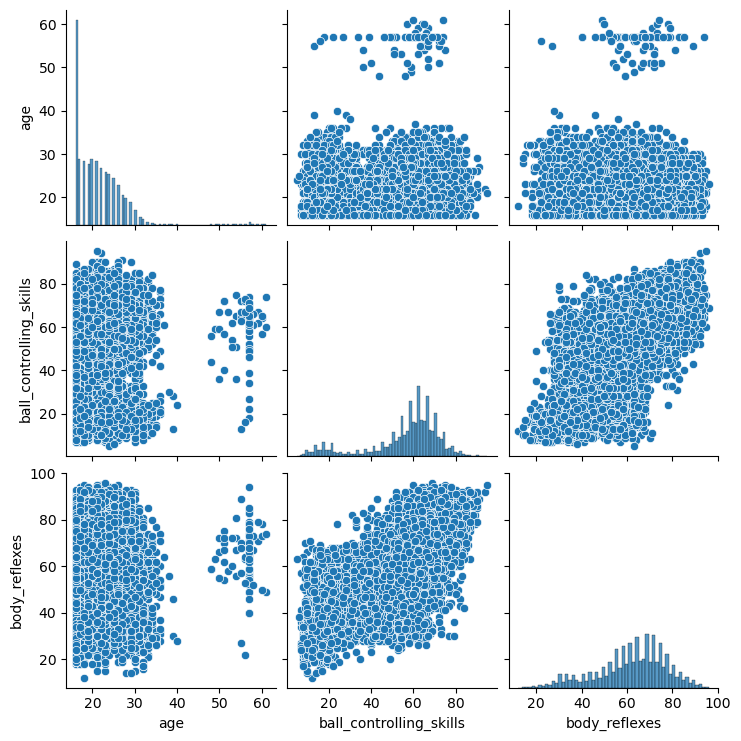

In [16]:
sns.pairplot(data[['age', 'ball_controlling_skills', 'body_reflexes']])
plt.show()

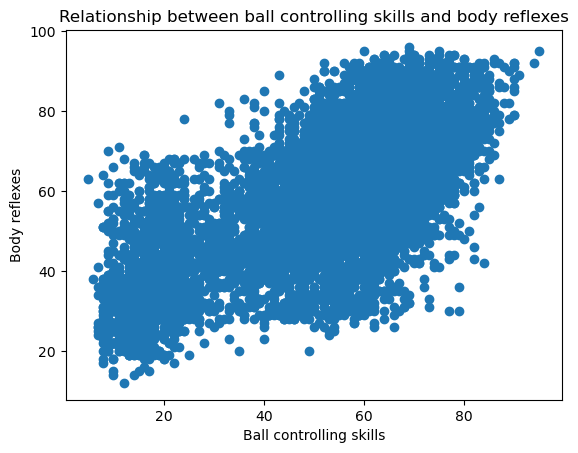

In [17]:
plt.scatter(data["ball_controlling_skills"], data["body_reflexes"])
plt.xlabel("Ball controlling skills")
plt.ylabel("Body reflexes")
plt.title("Relationship between ball controlling skills and body reflexes")
plt.show()

###### Multivariate  Analysis:

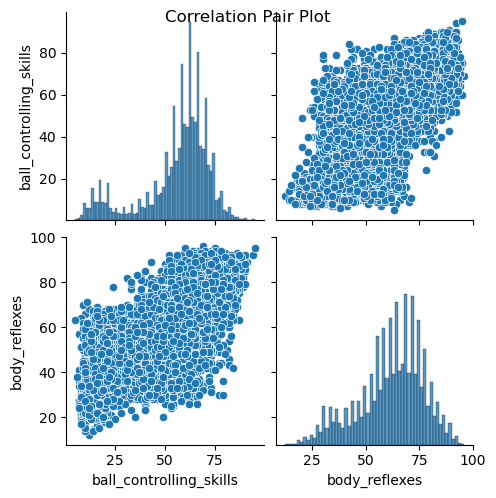

In [18]:
sns.pairplot(data[['height', 'weight', 'ball_controlling_skills', 'body_reflexes']])
plt.suptitle('Correlation Pair Plot')
plt.show()

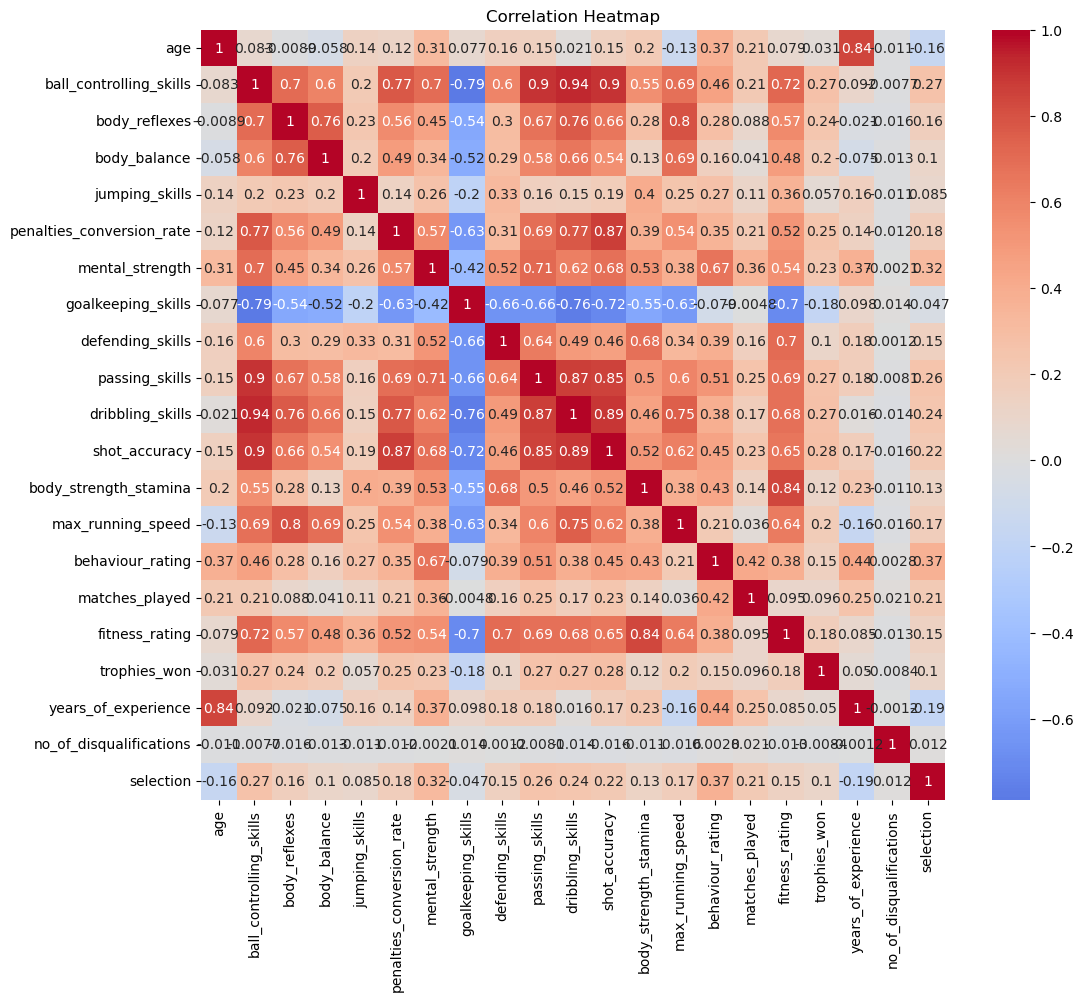

In [19]:
# Calculate correlation matrix
correlation_matrix = data.corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

###### Categorical Data Analysis:

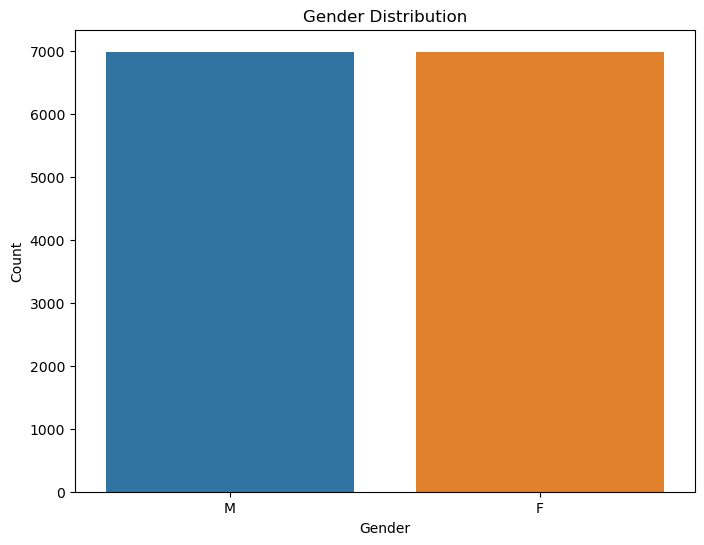

In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

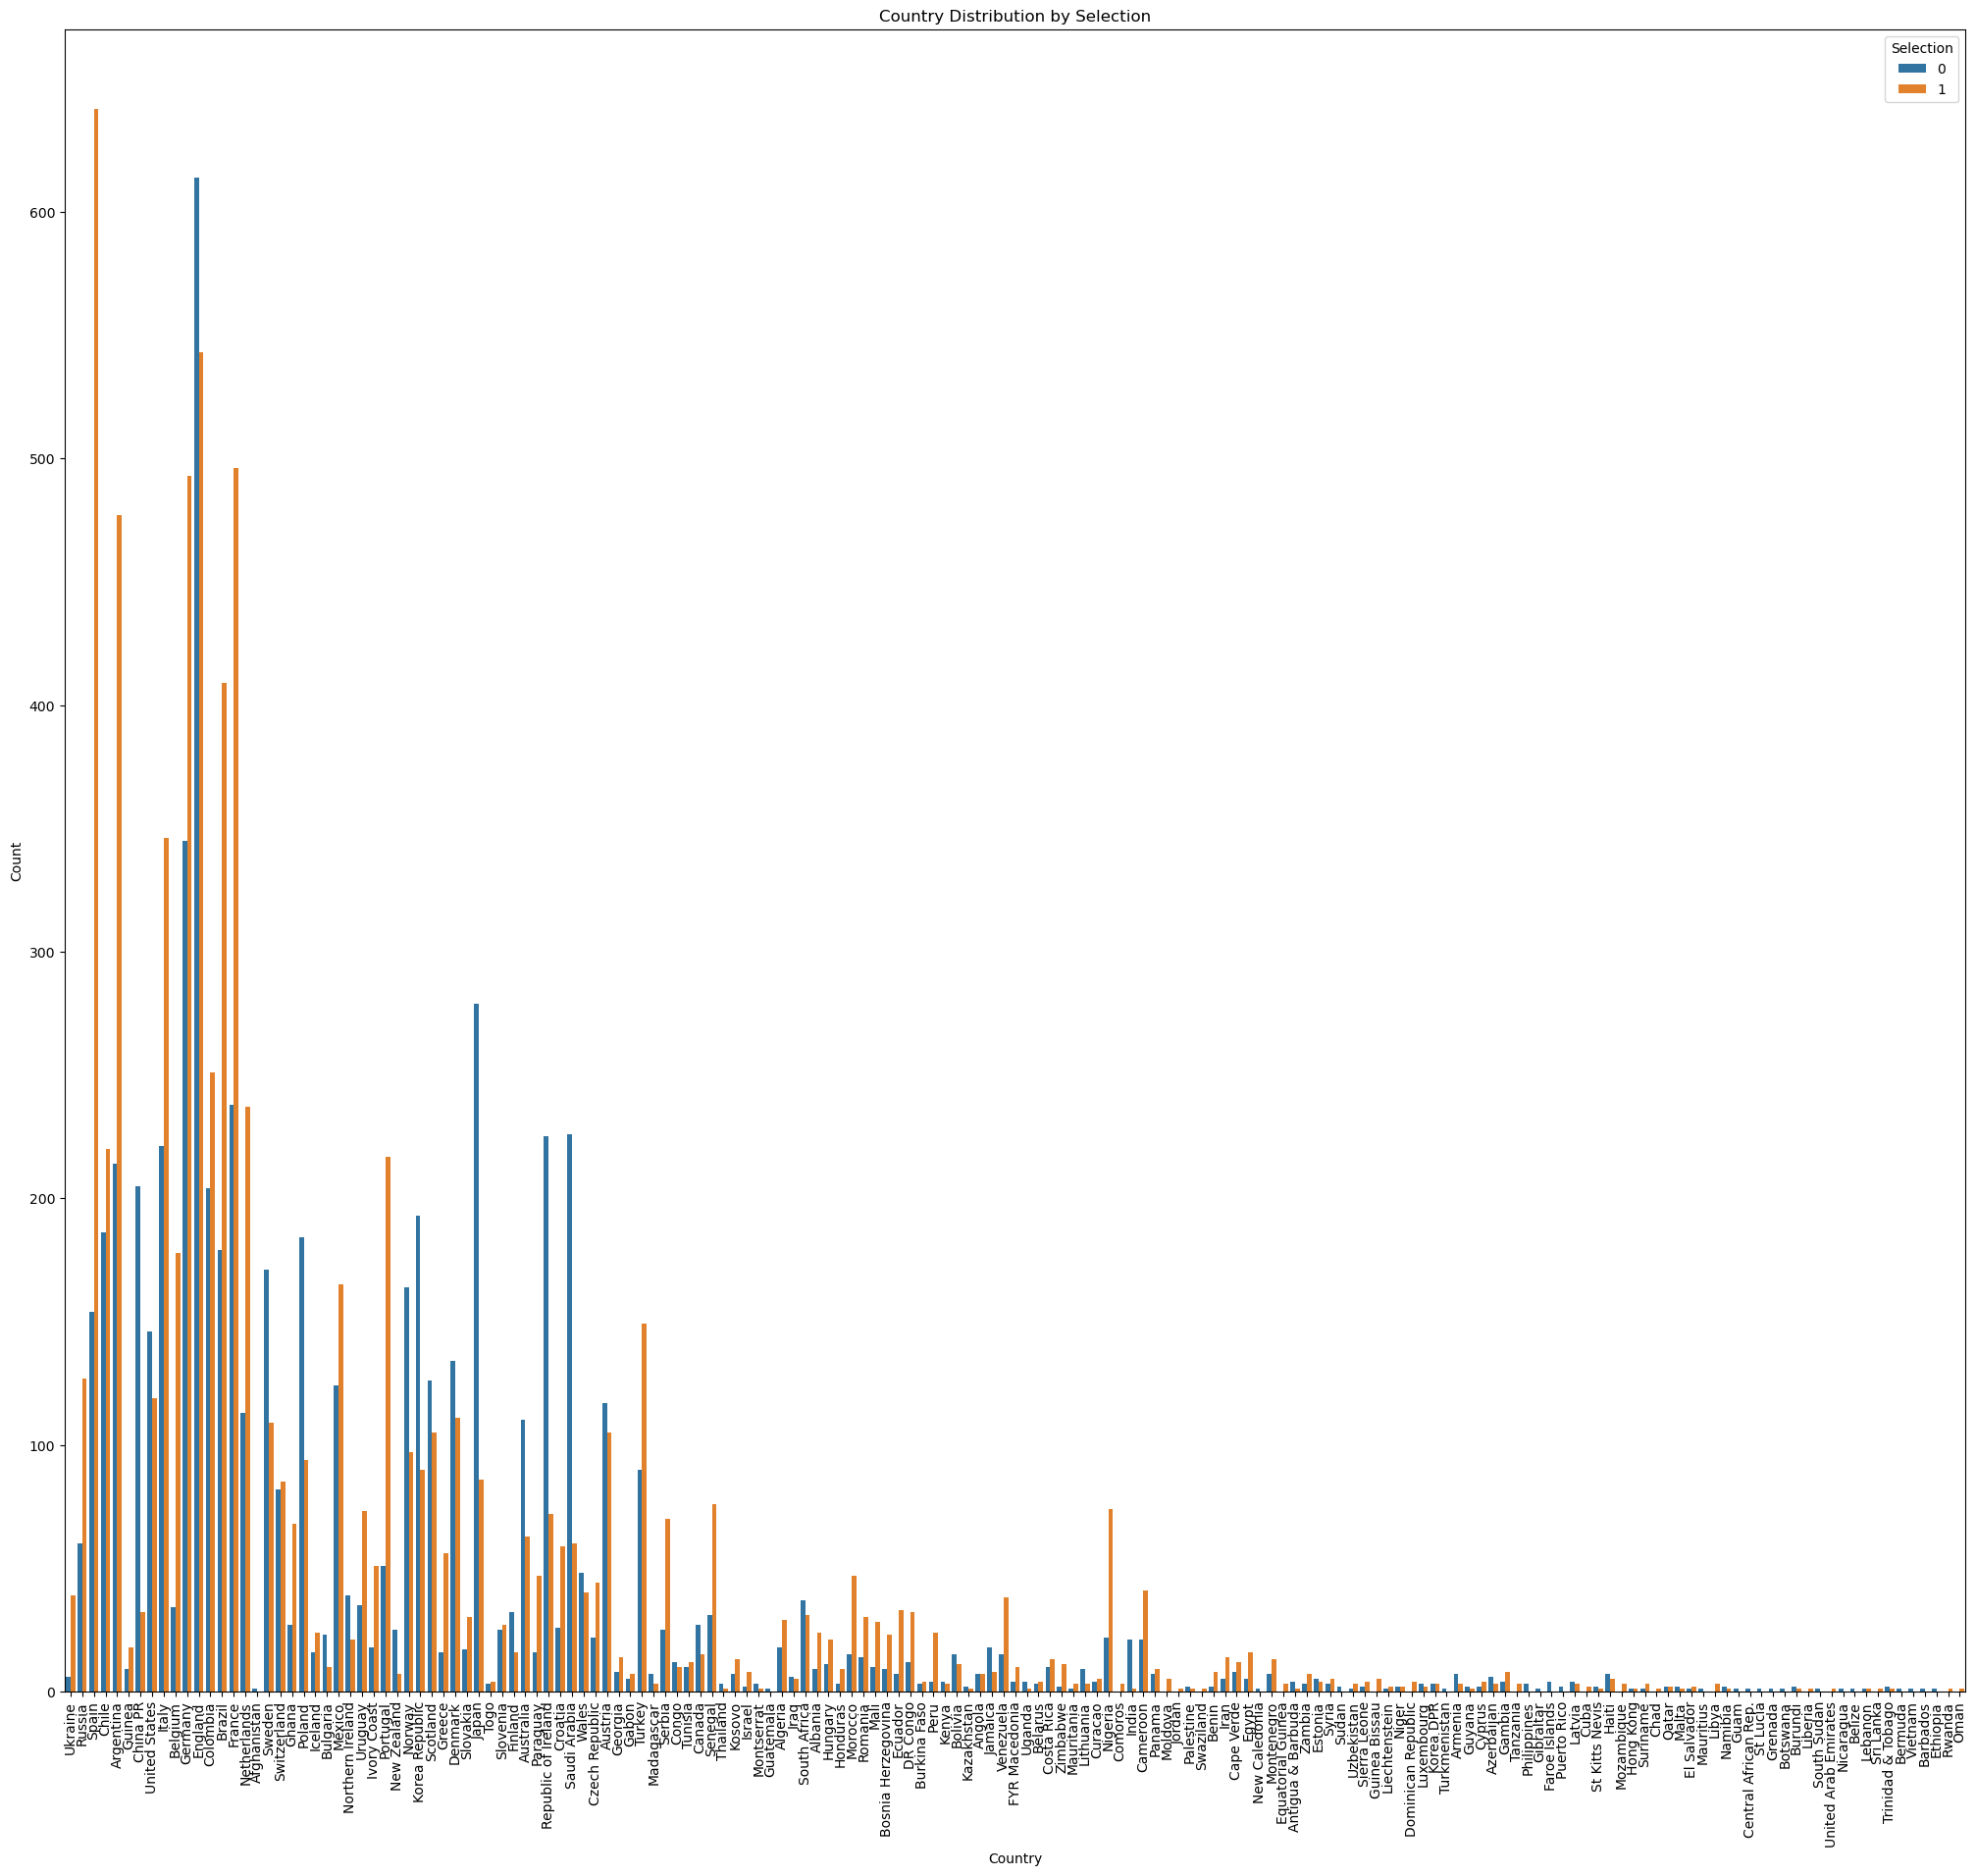

In [21]:
plt.figure(figsize=(25, 22))
sns.countplot(x='country', hue='selection', data=data)
plt.title('Country Distribution by Selection')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.legend(title='Selection')
plt.show()

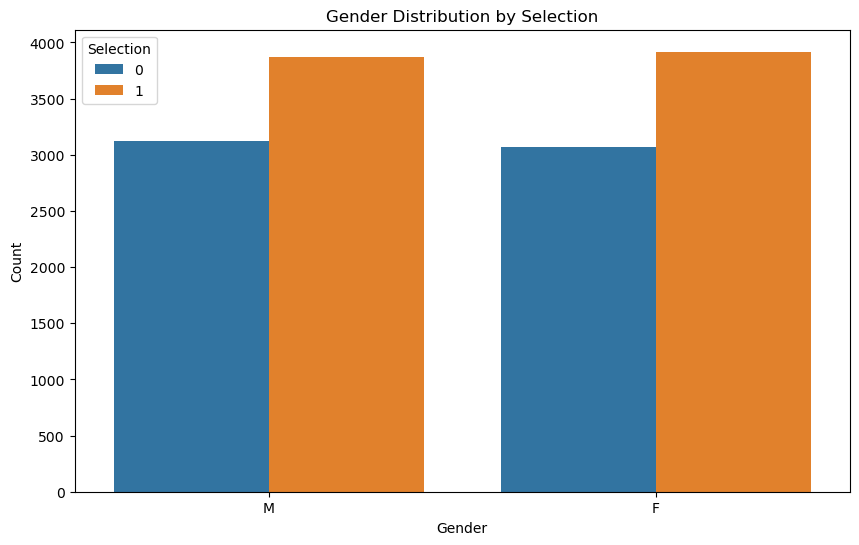

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='selection', data=data)
plt.title('Gender Distribution by Selection')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Selection')
plt.show()

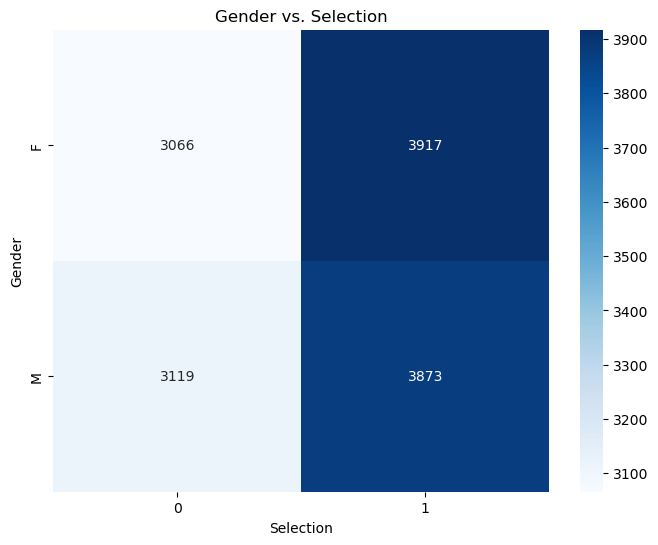

In [23]:
ctab = pd.crosstab(data['gender'], data['selection'])
plt.figure(figsize=(8, 6))
sns.heatmap(ctab, annot=True, fmt='d', cmap='Blues')
plt.title('Gender vs. Selection')
plt.xlabel('Selection')
plt.ylabel('Gender')
plt.show()

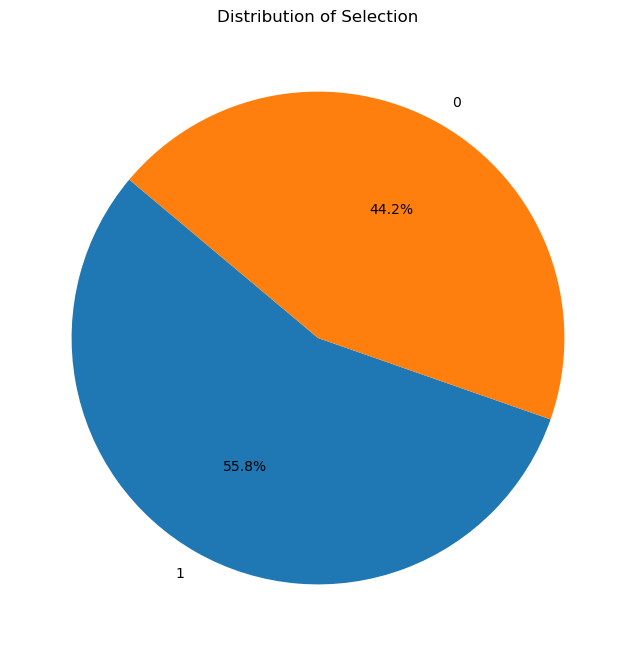

In [24]:
plt.figure(figsize=(8, 8))
selection_counts = data['selection'].value_counts()
plt.pie(selection_counts, labels=selection_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Selection')
plt.show()

### Perform Data cleaning and Outlier detection:

In [25]:
# Check for missing values:

data.isna().sum()

player_id                      0
name                           0
age                            0
gender                        19
country                        0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
strong_foot                  552
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
dedication_level               0
coaching                     125
years_of_experience          144
no_of_disqualifications        0
selection                      0
dtype: int

In [26]:
# Convert 'height' and 'weight' columns to numeric:

data["height"] = data["height"].apply(lambda x: int(x.split("'")[0]) * 12 + int(x.split("'")[1]))
data["weight"] = data["weight"].str.extract("(\d+)").astype(float)

In [27]:
# Identify data types of each column
data_types = data.dtypes

# Group columns into categorical and numerical
categorical_columns = data_types[data_types == 'object'].index
numerical_columns = data_types[data_types != 'object'].index

# Calculate the sum of null values for categorical and numerical columns
null_counts_categorical = data[categorical_columns].isna().sum()
null_counts_numerical = data[numerical_columns].isna().sum()

print("Null Values in Categorical Columns:")
print(null_counts_categorical)

print("\nNull Values in Numerical Columns:")
print(null_counts_numerical)

Null Values in Categorical Columns:
player_id             0
name                  0
gender               19
country               0
strong_foot         552
dedication_level      0
coaching            125
dtype: int64

Null Values in Numerical Columns:
age                            0
height                         0
weight                       417
ball_controlling_skills      413
body_reflexes                  0
body_balance                   0
jumping_skills                24
penalties_conversion_rate     30
mental_strength               28
goalkeeping_skills             0
defending_skills               0
passing_skills                 0
dribbling_skills               0
shot_accuracy                572
body_strength_stamina          0
max_running_speed              0
behaviour_rating             703
matches_played               666
fitness_rating               695
trophies_won                   0
years_of_experience          144
no_of_disqualifications        0
selection             

In [28]:
#Creating a list of features with null values:
features_with_na = [feature for feature in data.columns if data[feature].isnull().sum() > 1]

#Separate numerical and categorical features:
numerical_features_with_na = [feature for feature in features_with_na if data[feature].dtype != 'object']
categorical_features_with_na = [feature for feature in features_with_na if data[feature].dtype == 'object']

#Print categorical feature names and percentage of missing values:
print("Categorical Features:")
for feature in categorical_features_with_na:
    print(feature, np.round(data[feature].isnull().mean() * 100, 2), '% missing values')

#Print numerical feature names and percentage of missing values:
print("\nNumerical Features:")
for feature in numerical_features_with_na:
    print(feature, np.round(data[feature].isnull().mean() * 100, 2), '% missing values')

Categorical Features:
gender 0.14 % missing values
strong_foot 3.94 % missing values
coaching 0.89 % missing values

Numerical Features:
weight 2.98 % missing values
ball_controlling_skills 2.95 % missing values
jumping_skills 0.17 % missing values
penalties_conversion_rate 0.21 % missing values
mental_strength 0.2 % missing values
shot_accuracy 4.09 % missing values
behaviour_rating 5.02 % missing values
matches_played 4.76 % missing values
fitness_rating 4.97 % missing values
years_of_experience 1.03 % missing values


In [29]:
# Filling the missing values in the "Numerical Features" of the dataset with the median value of  each respective column:

numerical_features = [
    'weight','ball_controlling_skills', 'jumping_skills', 'penalties_conversion_rate',
    'mental_strength', 'shot_accuracy', 'behaviour_rating', 'matches_played',
    'fitness_rating', 'years_of_experience'
]

for col in numerical_features:
    data[col] = data[col].fillna(data[col].median())

In [30]:
# Filling the missing values in the 'Categorical Features' of the dataset with the  mode value of each respective column:

categorical_features = ['gender','strong_foot', 'coaching']

for col in categorical_features:
    data[col] = data[col].fillna(data[col].mode()[0])

In [31]:
# Again check for count of null values in each column after filling the missing values:

data.isna().sum()

player_id                    0
name                         0
age                          0
gender                       0
country                      0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
matches_played               0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64

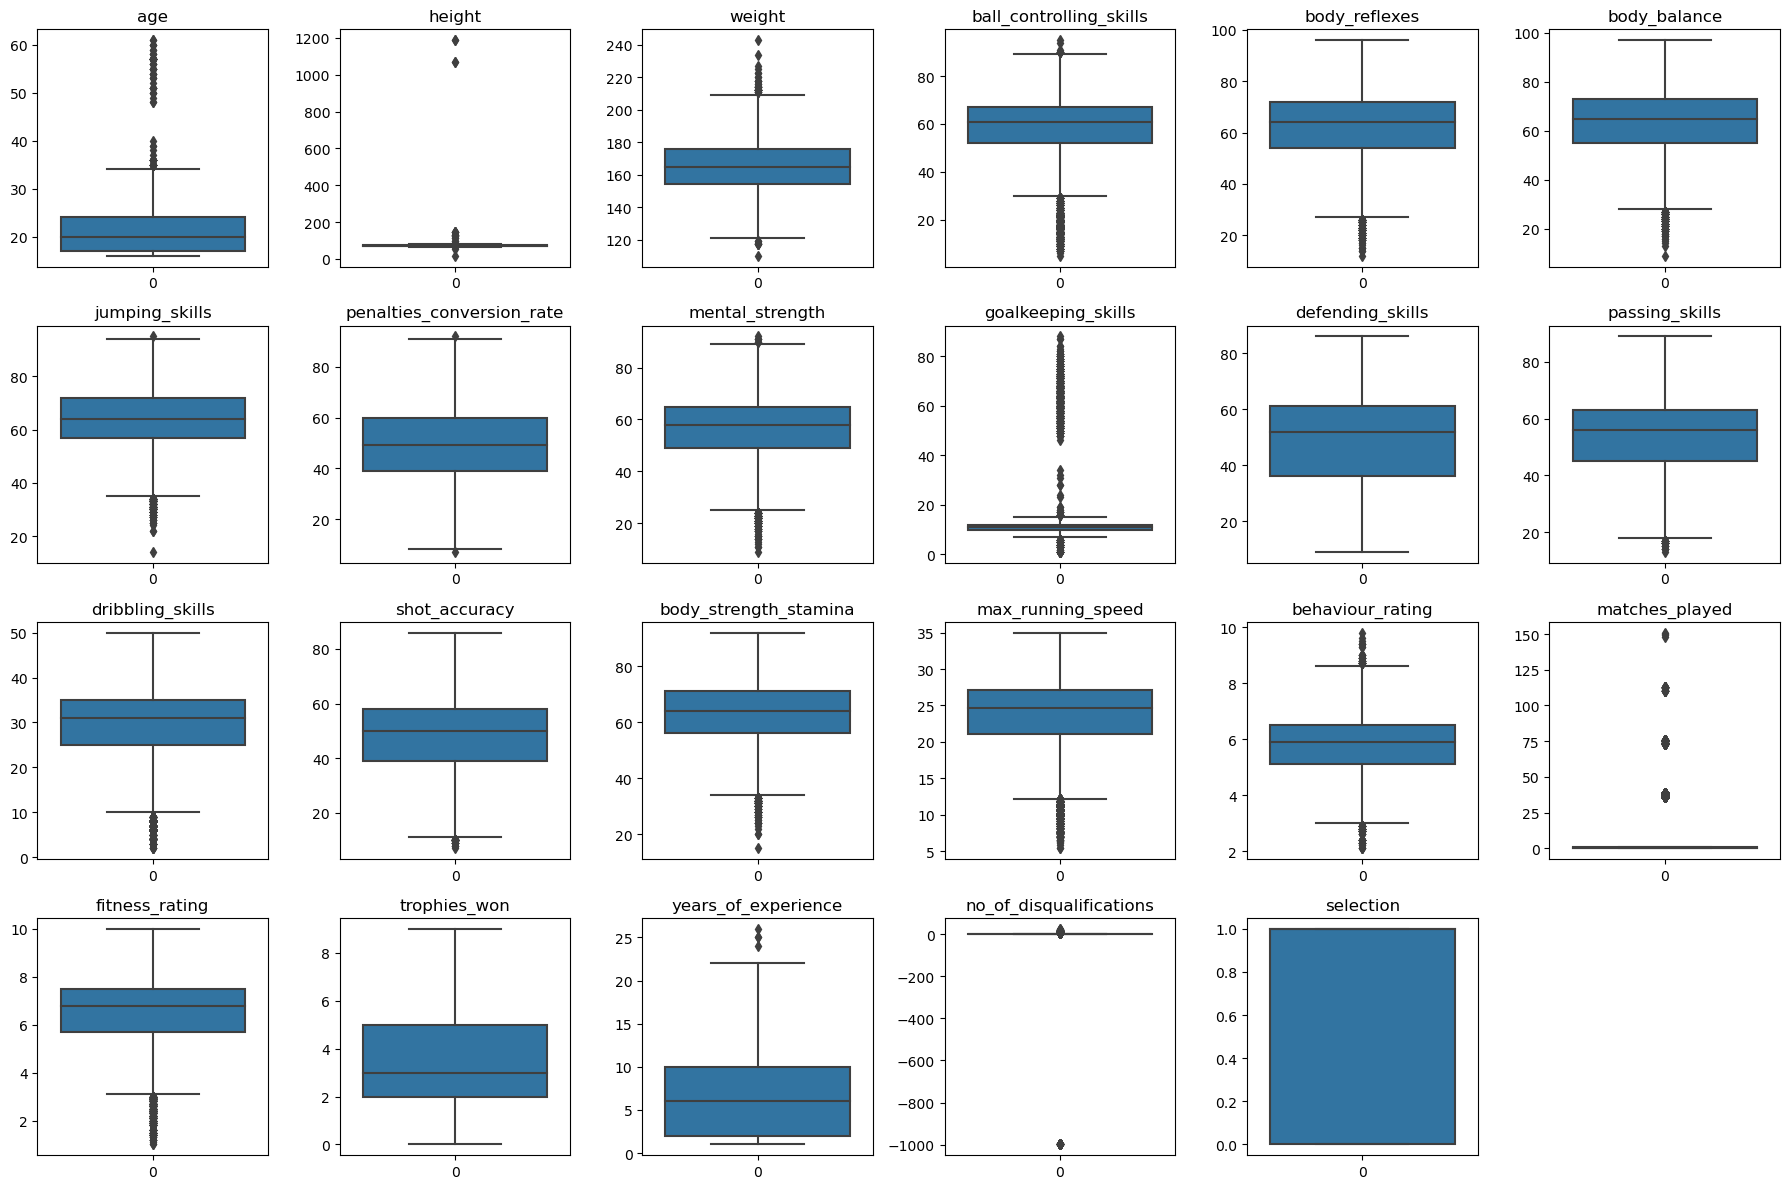

In [32]:
# Check for outliers:

# List of numerical columns
numerical_columns = [
    'age', 'height', 'weight', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 
    'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 
    'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills',
    'shot_accuracy', 'body_strength_stamina', 'max_running_speed',
    'behaviour_rating', 'matches_played', 'fitness_rating',
    'trophies_won', 'years_of_experience', 'no_of_disqualifications','selection'
]

# Create a grid of box plots
plt.figure(figsize=(18, 12))
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(4, 6, i)
    sns.boxplot(data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

In [33]:
# Drop unnecessary columns:
data = data.drop(['player_id', 'name'], axis=1)

In [34]:
# Check the distribution of the target variable:

data['selection'].value_counts()

1    7802
0    6192
Name: selection, dtype: int64

### Perfome Encoding:  

In [35]:
# List of categorical columns to be label encoded
categorical_columns = ['gender', 'country', 'strong_foot', 'dedication_level', 'coaching']

# Initialize the LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

#### Create a Heatmap to Visualize the Correlation:

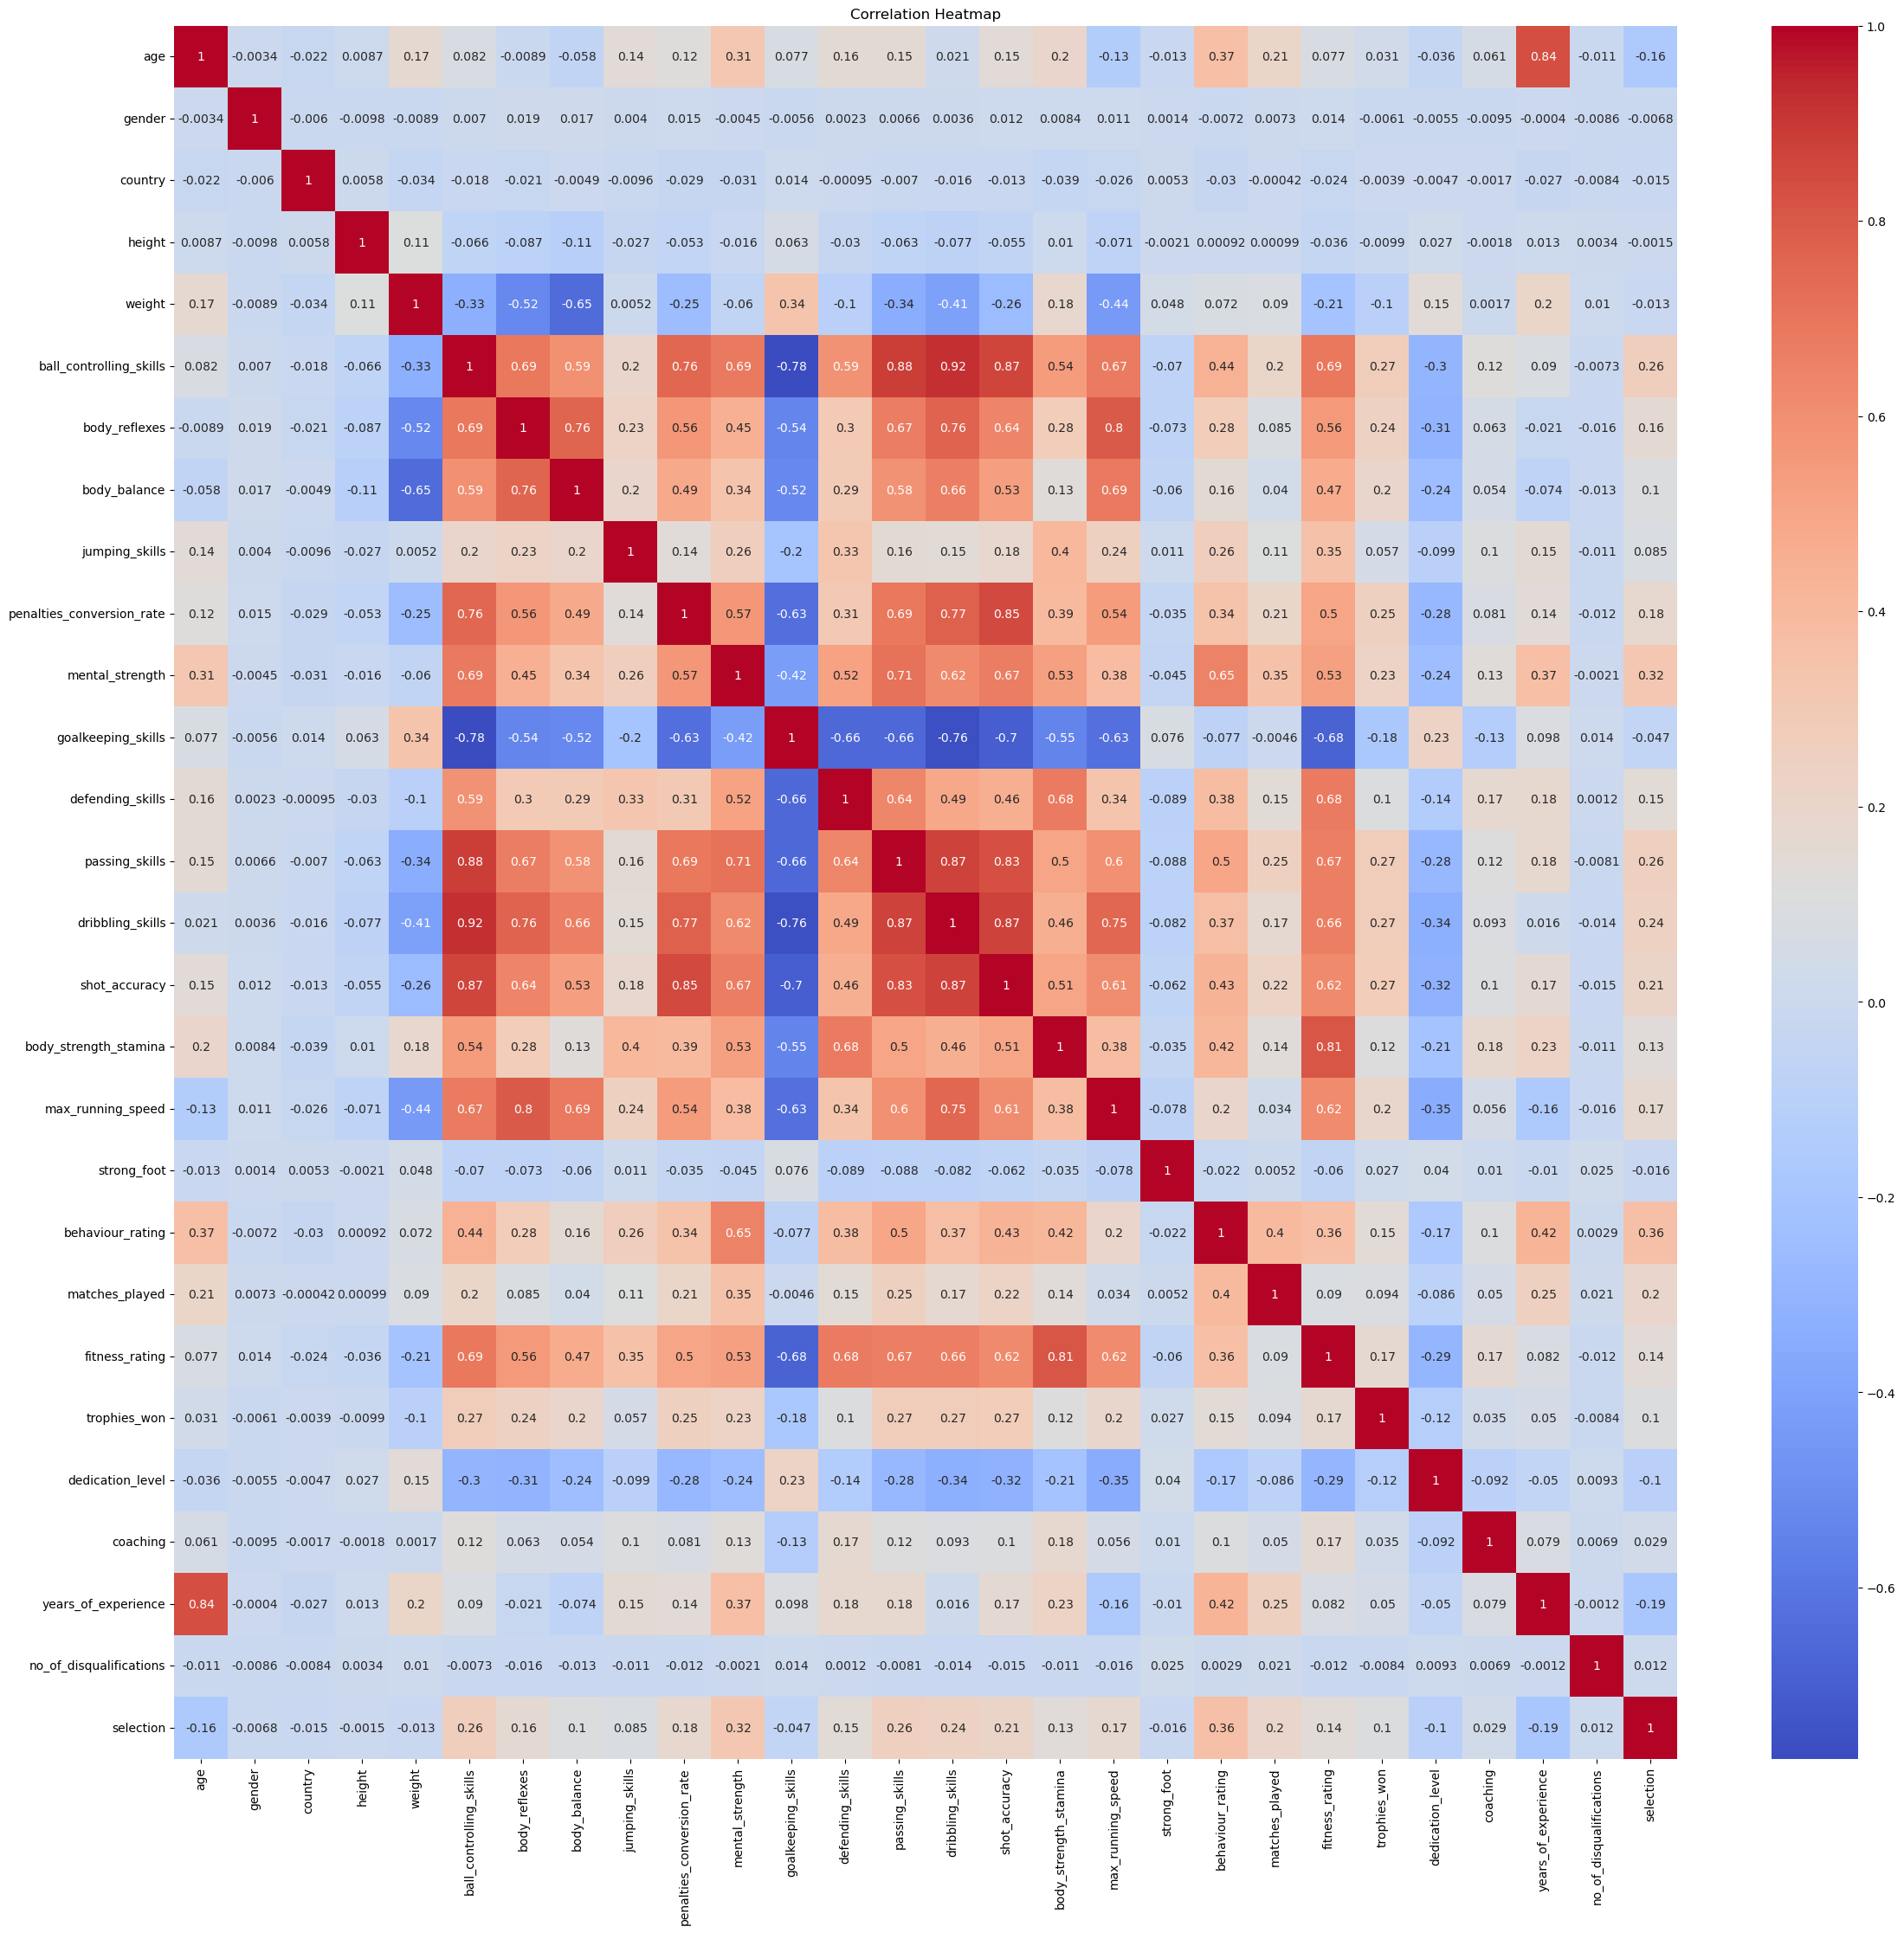

In [36]:
# Compute the correlation matrix
corr_matrix = data.corr()

# Create a heatmap:
plt.figure(figsize=(28, 26))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title and display the heatmap:
plt.title('Correlation Heatmap')
plt.show()

### Train and Evaluate the models by applying Classification Algorithms: 

In [37]:
# Without Scaling:

In [38]:
# Split the data into features (X) and target (y):

X = data.drop('selection', axis=1)     #independent variable
y = data['selection']     #dependent variable

In [39]:
# Hold Out Techiniques:
# Split the dataset into training and testing sets:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Random Forest Classifier

model1 = RandomForestClassifier(n_estimators = 10,max_depth = 20,criterion = 'entropy',min_samples_split = 3)
model1.fit(X_train, y_train)
y_pred_rf1 = model1.predict(X_test)


print('Accuracy = ',accuracy_score(y_test,y_pred_rf1))
print('precision = ',precision_score(y_test,y_pred_rf1, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_rf1, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_rf1, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_rf1))

Accuracy =  0.8295819935691319
precision =  0.8283850529861168
Recall =  0.8287161860043439
f1 score = 0.828541917382283
confusion_matrix =
 [[1052  234]
 [ 243 1270]]


In [41]:
# Decision Tree Classifier

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree Classifier
model2 = DecisionTreeClassifier()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(model2, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model2 = grid_search.best_estimator_
y_pred_dt2 = best_model2.predict(X_test)

print('Accuracy = ',accuracy_score(y_test,y_pred_dt2))
print('precision = ',precision_score(y_test,y_pred_dt2, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_dt2, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_dt2, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_dt2))

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy =  0.8170775276884602
precision =  0.8159596222601407
Recall =  0.8155747646884082
f1 score = 0.8157565883866669
confusion_matrix =
 [[1025  261]
 [ 251 1262]]


In [42]:
# Logistic Regression Classifier

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Inverse regularization strength
    'penalty': ['l1', 'l2'],          # Regularization type ('l1' or 'l2')
    'solver': ['liblinear', 'saga']   # Optimization algorithm ('liblinear' for 'l1', 'saga' for 'l2')
}

# Initialize the Logistic Regression model
model3 = LogisticRegression()

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(model3, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for predictions
best_model3 = grid_search.best_estimator_
y_pred_lr3 = best_model3.predict(X_test)


print('Accuracy = ',accuracy_score(y_test,y_pred_lr3))
print('precision = ',precision_score(y_test,y_pred_lr3, average='macro'))
print('Recall = ',recall_score(y_test,y_pred_lr3, average='macro'))
print('f1 score =',f1_score(y_test,y_pred_lr3, average='macro'))
print('confusion_matrix =\n',confusion_matrix(y_test,y_pred_lr3))

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy =  0.7767059664165773
precision =  0.776997945194736
Recall =  0.7722817489482032
f1 score = 0.773596941664336
confusion_matrix =
 [[ 923  363]
 [ 262 1251]]


In [43]:
print('Accuracy Random Forest = ',accuracy_score(y_test,y_pred_rf1))
print('Accuracy Decission Tree= ',accuracy_score(y_test,y_pred_dt2))
print('Accuracy logisticRegression= ',accuracy_score(y_test,y_pred_lr3))

Accuracy Random Forest =  0.8295819935691319
Accuracy Decission Tree=  0.8170775276884602
Accuracy logisticRegression=  0.7767059664165773


In [44]:
accuracies = {
    'Random Forest': accuracy_score(y_test, y_pred_rf1),
    'Decision Tree': accuracy_score(y_test, y_pred_dt2),
    'Logistic Regression': accuracy_score(y_test, y_pred_lr3)
}

max_accuracy = max(accuracies.values())

# Find the best models with the maximum accuracy
best_models = [model for model, accuracy in accuracies.items() if accuracy == max_accuracy]

# Print the best models
print("Best Model:")
for model in best_models:
    print(model)

print('Max Accuracy:', max_accuracy)


Best Model:
Random Forest
Max Accuracy: 0.8295819935691319
